# Operações pontuais em imagens 

In [1]:
#biblioteca opencv padrão de entrada BGR
import cv2
#essa biblioteca funciona para plots gráficos. Por isso, padrão de entrada é RGB
from matplotlib import pyplot as plt
import numpy as np
import math

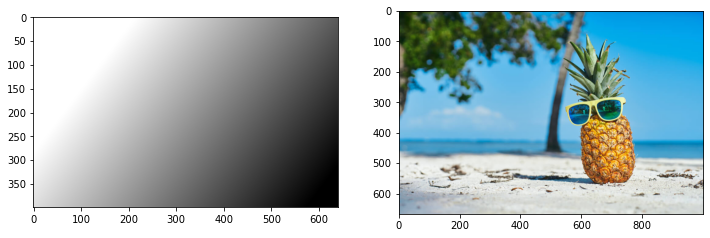

In [3]:
path = 'imagens/'
img1 = cv2.imread(path + 'quote2.png') #abrir a imagem
img2 = cv2.imread(path + 'praia.jpg') #abrir a imagem
plt.figure(figsize=(12,12)) #definido o tamanho 12 x 12 para apresentar a figura

plt.subplot(121) #fazendo um plot de várias imagens. Exemplo: uma linha, duas colunas, imagem 1. 
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) #transformando de bgr para rgb a fim de mostrar as cores reais

plt.subplot(122) # uma linha duas colunas imagem 2.
#transformar para imagem em escala de cinza - a imagem 2
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

## Podemos diminuir a dimensão da imagem (resized)

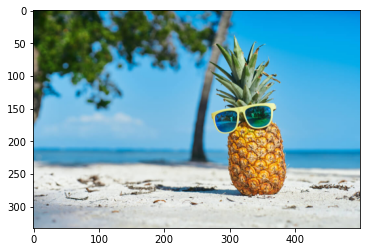

In [4]:
scale_percent = 50 # porcentagem da imagem original
width = int(img2.shape[1] * scale_percent / 100)
height = int(img2.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

## Podemos transformar a imagem colorida para nível de cinza

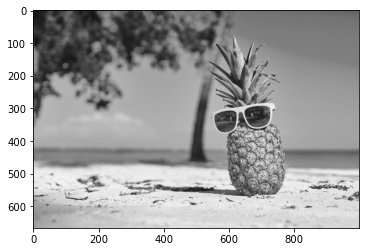

In [5]:
#converte BGR para escala cinza
img_pb = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
#novamente, conversão apenas para plot
plt.imshow(cv2.cvtColor(img_pb, cv2.COLOR_BGR2RGB))

## Transformando para imagem negativa
Pixel-wise, or point operators:

Transforma o valor de $z$ de algum pixel em um valor $s$ via a transformação do intervalo de nível de cinza, e.g. 0 to 255. Pode ser escrito por: $$s = T(z)$$
A transformação negativa é dada por: $$s = T(z) = 255-z$$

In [6]:
#para mostrar como podemos transformar valores de pixels 'z' em uma outra faixa de valores, 
# vamos criar um vetor contendo os 256 possíveis tons de cinza
z = np.arange(256)
s_ident = z
s_inver = 255-z

Podemos visualizar essas transformações por meio de funções traçadas num gráfico em que o eixo r indica o valor de entrada e um segundo eixo indica o valor resultante. Por exemplo, a inversão:

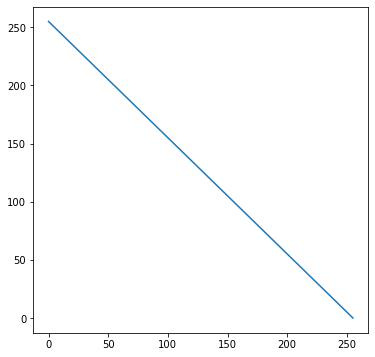

In [7]:
plt.figure(figsize=(6,6)) # deixa o aspecto da figura com o mesma altura e largura (6,6)
plt.plot(z, s_inver) # plota a transformacao da inversao
plt.show() # exibe o grafico

In [8]:
#invertendo os pixels da imagem 1 e da imagem 2.
img1_invert = 255-img1
img2_invert = 255-img2
img3_invert = 255 - img_pb

(-0.5, 639.5, 399.5, -0.5)

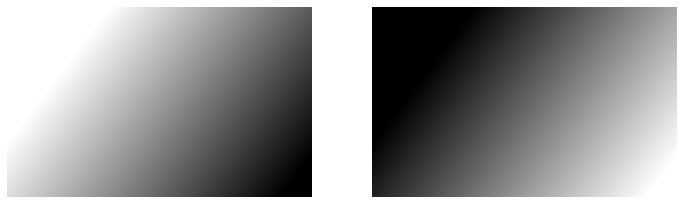

In [9]:
plt.figure(figsize=(12,12)) 
 
# defines a panel to show the images side by side
plt.subplot(121) # panel with 1 row, 2 columns, to show the image at the first (1st) position
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off') # remove axis with numbers

plt.subplot(122) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(cv2.cvtColor(img1_invert, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

(-0.5, 999.5, 666.5, -0.5)

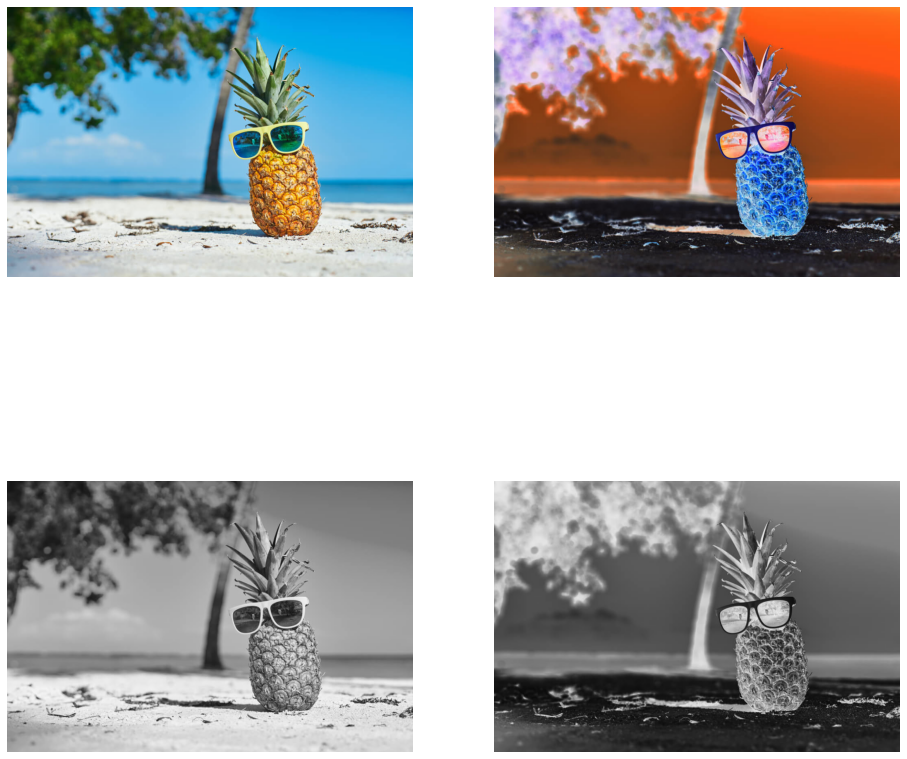

In [10]:
plt.figure(figsize=(16,16)) 
 
# defines a panel to show the images side by side
plt.subplot(221) # panel with 1 row, 2 columns, to show the image at the first (1st) position
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off') # remove axis with numbers

plt.subplot(222) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(cv2.cvtColor(img2_invert, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

plt.subplot(223) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(cv2.cvtColor(img_pb, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')


plt.subplot(224) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(cv2.cvtColor(img3_invert, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

## Para gerar a imagem normalizada (aumento de constraste)

(-0.5, 999.5, 666.5, -0.5)

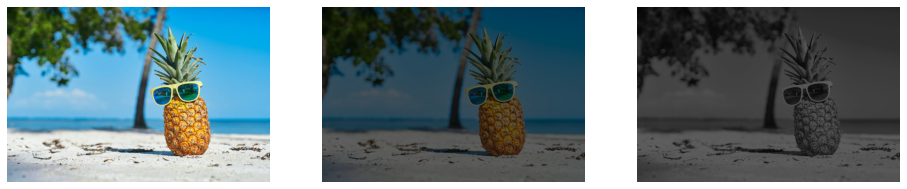

In [12]:
plt.figure(figsize=(16,16))
normalizedImg = img_pb
img_norm = cv2.normalize(img2,  normalizedImg, 0, 100, cv2.NORM_MINMAX)
img_norm_pb = cv2.normalize(img_pb,  normalizedImg, 0, 100, cv2.NORM_MINMAX)

plt.subplot(231) # panel with 1 row, 2 columns, to show the image at the first (1st) position
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off') # remove axis with numbers

plt.subplot(232) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(cv2.cvtColor(img_norm, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

plt.subplot(233) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(cv2.cvtColor(img_norm_pb, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

## Função logarítmica

As funções matemáticas são úteis para aprimorar as imagens.

A função $ \ log $ em particular diminui a faixa dinâmica entre os níveis de cinza para que os pixels escuros se tornem mais brilhantes, sem saturar os pixels já brilhantes.

No entanto, é importante encontrar uma transformação baseada em log para mapear valores entre 0 e 255 para valores também no mesmo intervalo. 

Se apenas aplicarmos um log, por exemplo, usando a base 2:
$$ s = \ log_2 (z) $$
assumindo $$ z = 128 $$, teríamos:

$$ s = \ log_2 (128) = 7 $$

o que diminuiu muito a faixa dinâmica dos níveis de cinza e dificultaria a visualização.

Deixe-nos traçar isso.

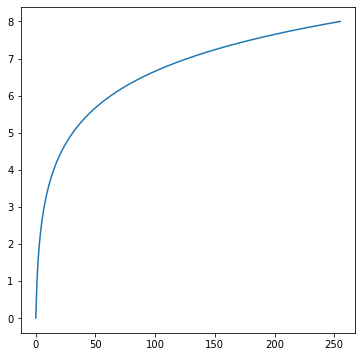

In [13]:
z_log2 = np.log2(z + 1)
plt.figure(figsize=(6,6))
plt.plot(z, z_log2)

Precisamos de fator de correção para redimensionar a saída para a desejada. Este fator é definido como: $$ \frac {L} {\ log_2 (1 + L)} $$ em que $ L $ são os níveis máximos de cinza na imagem redimensionada, por exemplo, 255

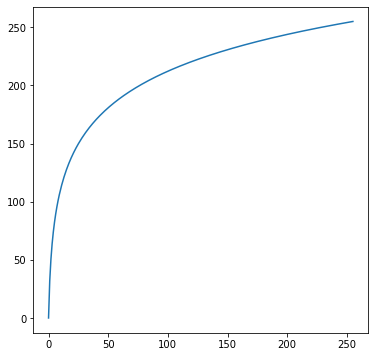

In [16]:
#Calculo do valor da constante C
c_scale = 255 / (np.log2(1+255))

#Calculo da transformação
z_log2 = c_scale * np.log2(z + 1)

#Plotar a figura
plt.figure(figsize=(6,6)) 
plt.plot(z, z_log2)

## Vamos aplicar isso em uma imagem

In [17]:
img_pb = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
#Aplica a função das duas imagens
#np.int32 converte pra inteiro de 32 bits...e o resultado converte pra unsigned int 8.
img1_log2 = (c_scale * np.log2(1 + img1.astype(np.int32))).astype(np.uint8)
img2_log2 = (c_scale * np.log2(1 + img2.astype(np.int32))).astype(np.uint8)
img2_log2_pb = (c_scale * np.log2(1 + img_pb.astype(np.int32))).astype(np.uint8)

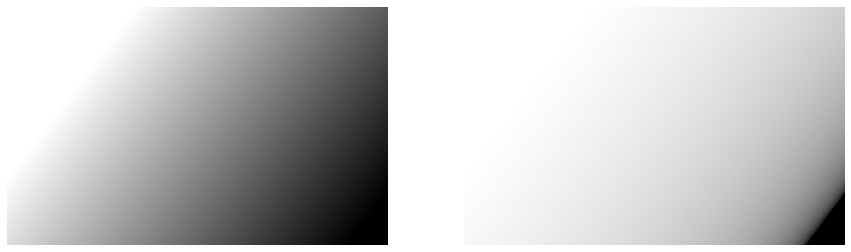

In [18]:
plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.axis('off')
plt.imshow(cv2.cvtColor(img1_log2, cv2.COLOR_BGR2RGB), cmap="gray")

(-0.5, 999.5, 666.5, -0.5)

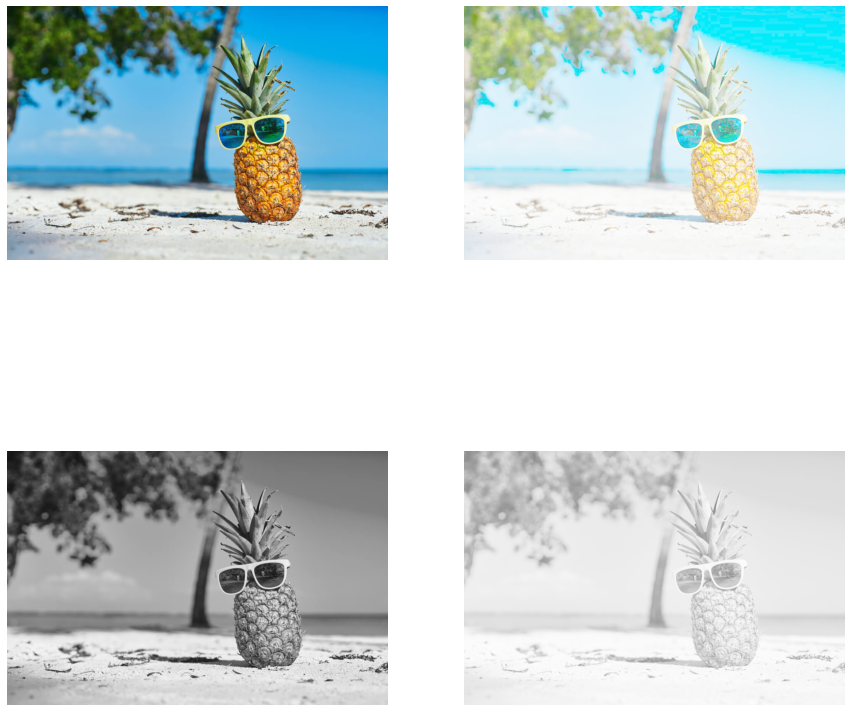

In [19]:
plt.figure(figsize=(15,15)) 
 
plt.subplot(221)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

plt.subplot(222)
plt.imshow(cv2.cvtColor(img2_log2, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

plt.subplot(223)
plt.imshow(cv2.cvtColor(img_pb, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

plt.subplot(224)
plt.imshow(cv2.cvtColor(img2_log2_pb, cv2.COLOR_BGR2RGB), cmap="gray")
plt.axis('off')

## Função logística
Aumenta o contraste usando a função logística sigmóide, que tem uma forma de "S".
O parâmetro k controla a suavidade da função. Dada pela fórmula $$ f(z) = \frac {L} {1 + e^{-k*(z-x0))}} $$

sendo:
x0 = 127 que é valor de x no ponto médio da curva sigmoide, 

L = 255 que é valor máximo da curva

k = declividade da curva.

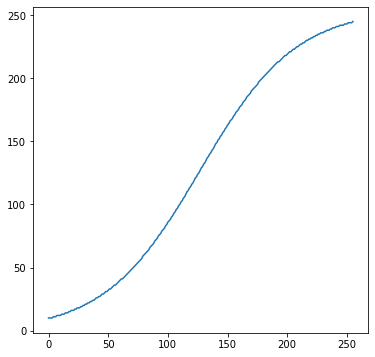

In [20]:
k = 0.025
s_sigmoid = (255/(1+np.exp(-k*(z-127)))).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.plot(z,s_sigmoid)

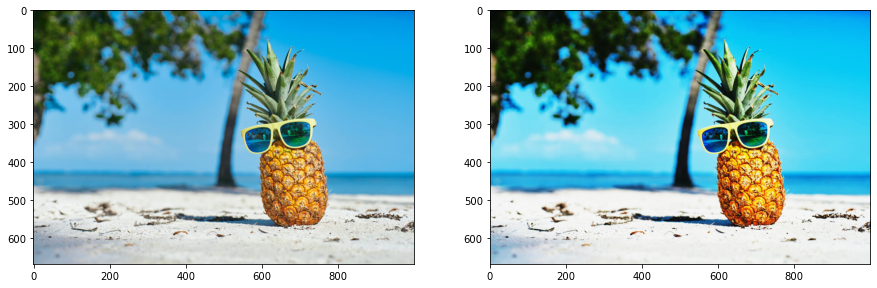

In [21]:
k = 0.03
img2_sigm = (255/(1+np.exp(-k*(img2.astype(np.int32)-127)))).astype(np.uint8)

plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB), cmap="gray")
plt.subplot(122)
plt.imshow(cv2.cvtColor(img2_sigm, cv2.COLOR_BGR2RGB), cmap="gray")

## Realce utilizando histogramas

Ao invés de operar unicamente a partir do valor de um pixel, podemos obter mais informações sobre a imagem de forma a tomar decisões sobre realce. Uma técnica comumente empregada é o histograma, que fornece estatística sobre a frequência das intensidades presentes na imagem. O histograma é obtido contando quantas vezes cada intensidade aparece na imagem

In [22]:
# randint permite criar rrays com números aleatorios inteiros
# abaixo, uma matriz 10x10 com valores entre 0 e 7
A = np.random.randint(0,8,[5,5])
print(A)

[[4 5 0 6 1]
 [2 1 3 6 0]
 [2 7 2 2 0]
 [2 1 5 3 0]
 [0 1 1 6 5]]


Ainda que de forma nao otimizada, uma maneira simples de obter o histograma seria, sabendo o intervalo de valores possiveis na imagem, percorrendo todos os pixels. Vamos criar uma função em python que calcule e retorne o histograma

In [23]:
def histogram(A, nbins):
    # obtem o tamanho da matriz
    N, M = A.shape
    # cria histograma vazio, com 'nbins' posicoes
    hist = np.zeros(nbins).astype(int)

    #percorre imagem, contando valores
    for x in range(N):
        for y in range(M):
            hist[A[x,y]] += 1 # incrementa histograma no valor A[x,y]
            
    return(hist)

Agora podemos utilizar essa função, chamando-a para a matriz, passando a quantidade de valores do histograma (também chamados de bins) e posteriormente imprimindo o histograma calculado

In [24]:
hist_A = histogram(A, 8)
print(hist_A)

[5 5 5 2 1 3 3 1]


O histograma é comumente exibido por meio de um gráfico de barras. Utilizaremos a função plt.bar, que recebe o intervalo e as contagens para exibir os valores

Text(0, 0.5, 'Frequencia')

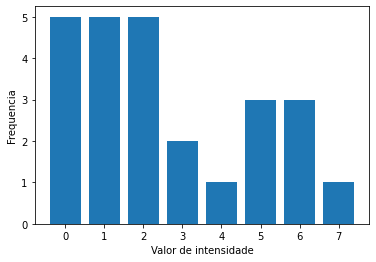

In [25]:
plt.bar(range(8), hist_A)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

Agora vamos calcular o histograma para duas imagens, e exibir os gráficos, da mesma forma que fizemos anteriormente para a matriz. Note a distribuição dos tons de cinza de acordo com sa características de brilho e contraste das imagens.

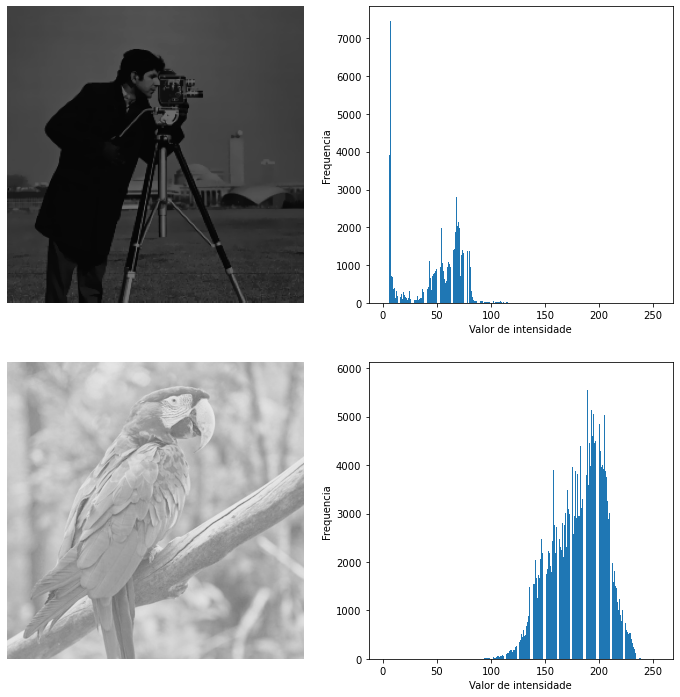

In [27]:
img3 = cv2.imread(path + "cameraman.png")
img4 = cv2.imread(path + "arara.jpg")

# calculamos o histograma considerando a contagem de 256 valores (tons de cinza)
#novamente precisei deixar no modelo BGR pelo fato do OPENCV. Se usar outra bib, por exemplo imageio
#isso nao é necessario. 
img3_pb = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4_pb = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

hist_img1 = histogram( img3_pb, 256)
hist_img2 = histogram(img4_pb , 256)

# exibindo imagens e histogramas (note que uso vmin, vmax para exibir todo o intervalo de tons de cinza)
plt.figure(figsize=(12,12)) 
plt.subplot(221)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(223)
plt.imshow(img4, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.bar(range(256), hist_img1)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

plt.subplot(224)
plt.bar(range(256), hist_img2)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')
plt.show()

A imagem da esquerda, Cameraman possui predominância de tons escuros, enquanto a imagem da direita, Scarlett possui muitos pixels de intensidade mais clara. Assim, o histograma oferece a informação da distribuição dos tons de cinza na imagem.

Podemos usar essa informação como base para criar uma transformação obtida diretamente a partir dos dados da imagem

Esse tipo de transformação é conhecida como Equalização de Histograma.

A equalização de histograma utiliza o histograma acumulado para obter uma função de transferência (ou de transformação) para realce da imagem. Note que não estamos projetando manualmente a transformação de realce, mas sim computando diretamente a partir dos dados (um tipo de "data-driven enhancement")

Para isso primeiramente obtemos o histograma cumulativo, e depois escalamos esse histograma cumulativo de forma a obter uma transformação que nos leve do intervalo original de tons de cinza (e.g. 0-255), para o mesmo intervalo 

A transformação, para cada valor de pixel r é dada por: $$s = T(r) = \frac{L-1}{MN} hc(r)$$

onde hc é o histograma cumulativo, e hc(r) é o valor do histograma cumulativo para a intensidade r

In [28]:
def histogram_equalization(A, values):
    # obtem histograma em matriz com total de valores dado por 'values'
    hist = histogram(A, values)
    
    # cria histograma cumulativo vazio, do mesmo tamanho do histograma 
    histC = np.zeros(hist.shape).astype(int)

    # calcula histograma cumulativo
    histC[0] = hist[0]
    for i in range(1, values):
        histC[i] = hist[i] + histC[i-1]

    # tamanho da imagem/matriz    
    N, M = A.shape
    
    # o vetor abaixo e usado para guardar a funcao de transformacao, 
    # apenas para propositos didaticos (iremos visualizar posteriormente)
    hist_transform = np.zeros(values).astype(np.uint8)
    
    # nova imagem equalizada
    A_eq = np.zeros(A.shape).astype(np.uint8)
    
    # transforma as intensidades de 'A' usando histC como funcao de transferencia
    # para cada tom de cinza
    for r in range(values):
        # computa qual seria o novo valor 's', dado o valor atual 'r' 
        s = ((values-1)/float(M*N))*histC[r]
        
        # em toda posicao de "A" que existir um valor 'r', 
        # entao na nova imagem esse pixel sera 's'
        A_eq[ np.where(A == r) ] = s
        
        # guardamos a transformacao
        hist_transform[r] = s
    
    return (A_eq, hist_transform)

Equalizando as imagens. Repare que a equalizacao de histograma tenta deixar o histograma mais proximo do uniformemente distribuido.

In [29]:
img1_eq, img1_transf = histogram_equalization(img3_pb, values=256)
img2_eq, img2_transf = histogram_equalization(img4_pb, values=256)

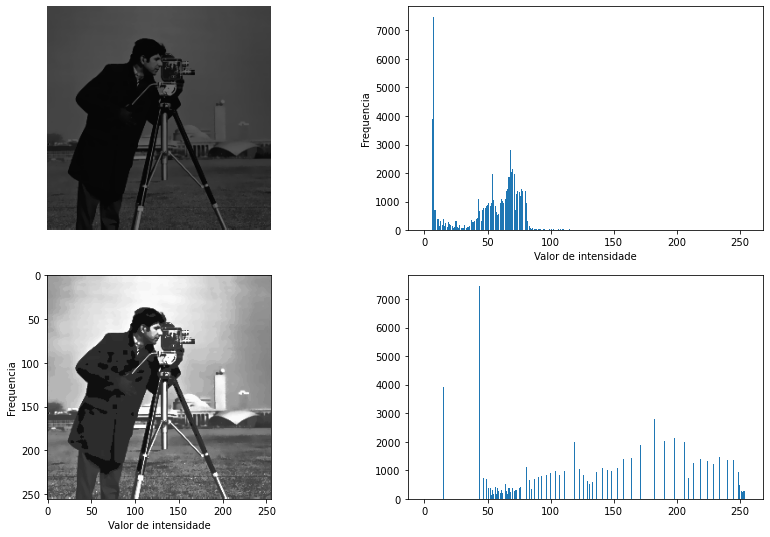

In [46]:
# novos histogramas
histeq_img1 = histogram(img1_eq, 256)
histeq_img2 = histogram(img2_eq, 256)

# exibindo imagens, histogramas e transformacoes

# imagem Cameraman
plt.figure(figsize=(14,14)) 
plt.subplot(321)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(322)
plt.bar(range(256), hist_img1)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

plt.subplot(323)
plt.imshow(img1_eq, cmap="gray", vmin=0, vmax=255)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

plt.subplot(324)
plt.bar(range(256), histeq_img1)
plt.show()


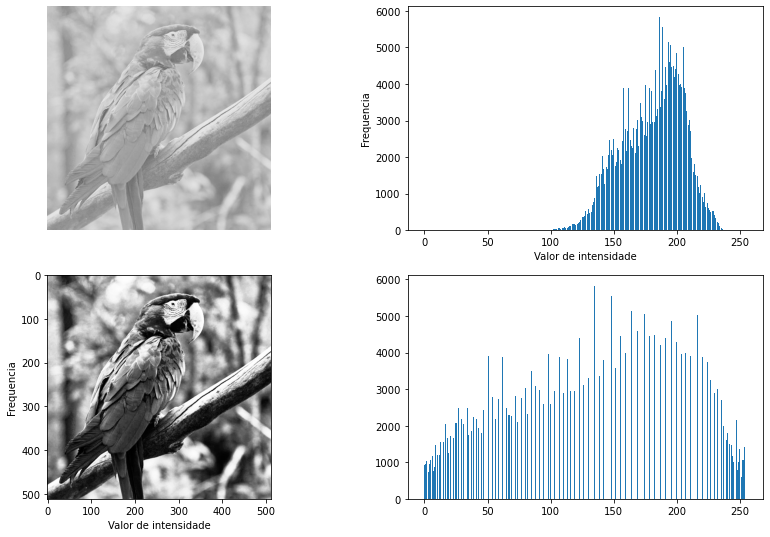

In [48]:
#imagem arara
plt.figure(figsize=(14,14)) 
plt.subplot(321)
plt.imshow(img4, cmap="gray", vmin=0, vmax=255)
plt.axis('off')         
         
plt.subplot(322)
plt.bar(range(256), hist_img2)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

plt.subplot(323)
plt.imshow(img2_eq, cmap="gray", vmin=0, vmax=255)
plt.xlabel('Valor de intensidade')
plt.ylabel('Frequencia')

plt.subplot(324)
plt.bar(range(256), histeq_img2)
plt.show()

No OpenCV e numpy, há métodos já disponíveis para acesso a histogramas e equalização

## Testando na imagem Lena

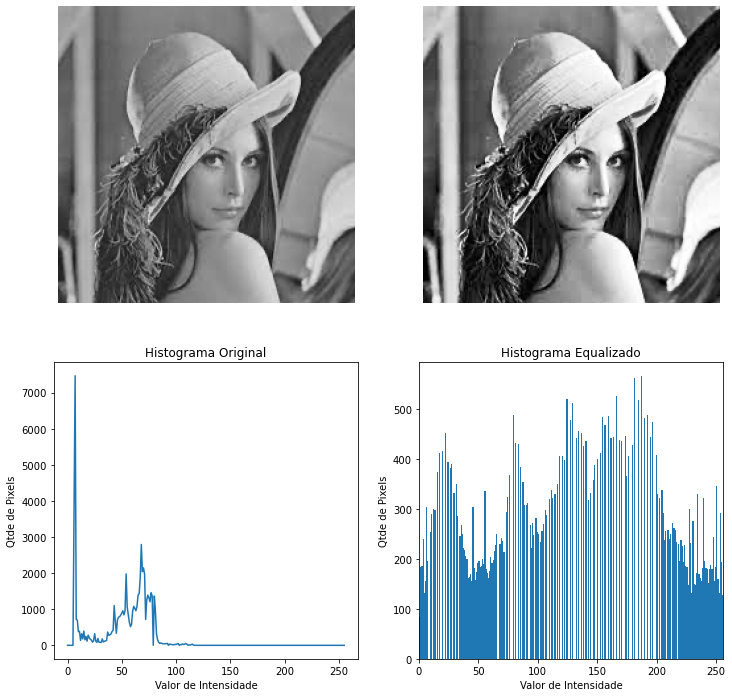

In [49]:
#em imagem em escala de cinza
img5 = cv2.imread(path + 'lena.png')
img5_pb = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
h = cv2.calcHist([img3_pb], [0], None, [256], [0, 256])
#equalização do histograma
h_eq = cv2.equalizeHist(img5_pb)
#transformando a imagem
img5_pb_eq = h_eq

plt.figure(figsize=(12,12)) 
plt.subplot(221)
plt.imshow(img5_pb, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(223)
plt.title("Histograma Original")
plt.xlabel("Valor de Intensidade")
plt.ylabel("Qtde de Pixels")
plt.plot(h)

plt.subplot(222)
plt.imshow(img5_pb_eq, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(224)
plt.title("Histograma Equalizado")
plt.xlabel("Valor de Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(h_eq.ravel(),bins = 256, range = [0,256]) 
plt.xlim([0, 256])
plt.show()

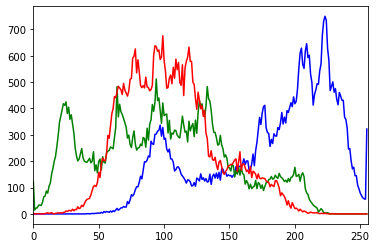

In [50]:
#em imagem colorida
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


# Referências:
Livro de Richard Szeliski: http://szeliski.org/Book/